In [1]:
#Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading the data for training and testing
data = pd.read_csv('train_customers.csv')

In [3]:
data.describe()

,dob,status,verified
count,3046.000000,34674.000000,34674.000000
mean,1991.210768,0.998991,0.956538
std,48.422045,0.031756,0.203898
min,1.000000,0.000000,0.000000
25%,1986.000000,1.000000,1.000000
50%,1993.000000,1.000000,1.000000
75%,1999.000000,1.000000,1.000000
max,2562.000000,1.000000,1.000000


In [4]:
data.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16
1,ZGFSYCZ,Male,NaN,1,1,EN,09/02/2018 12:04,09/02/2018 12:04
2,S2ALZFL,Male,NaN,0,1,EN,14/03/2018 18:31,14/03/2018 18:31
3,952DBJQ,Male,NaN,1,1,EN,15/03/2018 19:47,15/03/2018 19:47
4,1IX6FXS,Male,NaN,1,1,EN,15/03/2018 19:57,15/03/2018 19:57


In [5]:
data['gender'] = data['gender'].map({'Male': 1 ,'Female': 0})

In [6]:
data.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,1.0,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16
1,ZGFSYCZ,1.0,NaN,1,1,EN,09/02/2018 12:04,09/02/2018 12:04
2,S2ALZFL,1.0,NaN,0,1,EN,14/03/2018 18:31,14/03/2018 18:31
3,952DBJQ,1.0,NaN,1,1,EN,15/03/2018 19:47,15/03/2018 19:47
4,1IX6FXS,1.0,NaN,1,1,EN,15/03/2018 19:57,15/03/2018 19:57


In [7]:
#droping dod and Language columns
data = data.drop('dob', axis=1)
data = data.drop('language',axis=1)

In [8]:
data

,akeed_customer_id,gender,status,verified,created_at,updated_at
0,TCHWPBT,1.0,1,1,07/02/2018 19:16,07/02/2018 19:16
1,ZGFSYCZ,1.0,1,1,09/02/2018 12:04,09/02/2018 12:04
2,S2ALZFL,1.0,0,1,14/03/2018 18:31,14/03/2018 18:31
3,952DBJQ,1.0,1,1,15/03/2018 19:47,15/03/2018 19:47
4,1IX6FXS,1.0,1,1,15/03/2018 19:57,15/03/2018 19:57
...,...,...,...,...,...,...
34669,JAI79PE,NaN,1,1,03/03/2020 13:01,03/03/2020 13:02
34670,TR75VFL,NaN,1,1,03/03/2020 13:22,03/03/2020 13:22
34671,SQMJ08H,NaN,1,1,03/03/2020 13:24,03/03/2020 13:24
34672,9LW9CHN,NaN,1,1,03/03/2020 13:24,03/03/2020 13:28


In [9]:
#Creating order [date,time] and update[date and time] columns
data['order_date'] =pd.to_datetime(data['created_at']).dt.date
data['order_time'] =pd.to_datetime(data['created_at']).dt.time
data['update_date'] =pd.to_datetime(data['updated_at']).dt.date
data['update_time'] =pd.to_datetime(data['updated_at']).dt.time

In [10]:
data

,akeed_customer_id,gender,status,verified,created_at,updated_at,order_date,order_time,update_date,update_time
0,TCHWPBT,1.0,1,1,07/02/2018 19:16,07/02/2018 19:16,2018-07-02,19:16:00,2018-07-02,19:16:00
1,ZGFSYCZ,1.0,1,1,09/02/2018 12:04,09/02/2018 12:04,2018-09-02,12:04:00,2018-09-02,12:04:00
2,S2ALZFL,1.0,0,1,14/03/2018 18:31,14/03/2018 18:31,2018-03-14,18:31:00,2018-03-14,18:31:00
3,952DBJQ,1.0,1,1,15/03/2018 19:47,15/03/2018 19:47,2018-03-15,19:47:00,2018-03-15,19:47:00
4,1IX6FXS,1.0,1,1,15/03/2018 19:57,15/03/2018 19:57,2018-03-15,19:57:00,2018-03-15,19:57:00
...,...,...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,1,1,03/03/2020 13:01,03/03/2020 13:02,2020-03-03,13:01:00,2020-03-03,13:02:00
34670,TR75VFL,NaN,1,1,03/03/2020 13:22,03/03/2020 13:22,2020-03-03,13:22:00,2020-03-03,13:22:00
34671,SQMJ08H,NaN,1,1,03/03/2020 13:24,03/03/2020 13:24,2020-03-03,13:24:00,2020-03-03,13:24:00
34672,9LW9CHN,NaN,1,1,03/03/2020 13:24,03/03/2020 13:28,2020-03-03,13:24:00,2020-03-03,13:28:00


In [11]:
#Dropping the created_at and update_at columns
data = data.drop('created_at',axis=1)
data = data.drop('updated_at',axis=1)

In [12]:
data

,akeed_customer_id,gender,status,verified,order_date,order_time,update_date,update_time
0,TCHWPBT,1.0,1,1,2018-07-02,19:16:00,2018-07-02,19:16:00
1,ZGFSYCZ,1.0,1,1,2018-09-02,12:04:00,2018-09-02,12:04:00
2,S2ALZFL,1.0,0,1,2018-03-14,18:31:00,2018-03-14,18:31:00
3,952DBJQ,1.0,1,1,2018-03-15,19:47:00,2018-03-15,19:47:00
4,1IX6FXS,1.0,1,1,2018-03-15,19:57:00,2018-03-15,19:57:00
...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,1,1,2020-03-03,13:01:00,2020-03-03,13:02:00
34670,TR75VFL,NaN,1,1,2020-03-03,13:22:00,2020-03-03,13:22:00
34671,SQMJ08H,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:24:00
34672,9LW9CHN,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:28:00


In [13]:
#Creating columns year,month and day from order_date
data['year'] = pd.to_datetime(data['order_date']).dt.year
data['month'] =pd.to_datetime(data['order_date']).dt.month
data['date']= pd.to_datetime(data['order_date']).dt.day

In [14]:
data

,akeed_customer_id,gender,status,verified,order_date,order_time,update_date,update_time,year,month,date
0,TCHWPBT,1.0,1,1,2018-07-02,19:16:00,2018-07-02,19:16:00,2018,7,2
1,ZGFSYCZ,1.0,1,1,2018-09-02,12:04:00,2018-09-02,12:04:00,2018,9,2
2,S2ALZFL,1.0,0,1,2018-03-14,18:31:00,2018-03-14,18:31:00,2018,3,14
3,952DBJQ,1.0,1,1,2018-03-15,19:47:00,2018-03-15,19:47:00,2018,3,15
4,1IX6FXS,1.0,1,1,2018-03-15,19:57:00,2018-03-15,19:57:00,2018,3,15
...,...,...,...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,1,1,2020-03-03,13:01:00,2020-03-03,13:02:00,2020,3,3
34670,TR75VFL,NaN,1,1,2020-03-03,13:22:00,2020-03-03,13:22:00,2020,3,3
34671,SQMJ08H,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:24:00,2020,3,3
34672,9LW9CHN,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:28:00,2020,3,3


In [15]:
data['Dates'] = pd.to_datetime(data['order_date'])

In [16]:
from datetime import date

dt0 = pd.to_datetime('2018-7-1')
dt1 = data.Dates

delte = dt1 - dt0
data['days']= delte 

In [17]:
data

,akeed_customer_id,gender,status,verified,order_date,order_time,update_date,update_time,year,month,date,Dates,days
0,TCHWPBT,1.0,1,1,2018-07-02,19:16:00,2018-07-02,19:16:00,2018,7,2,2018-07-02,1 days
1,ZGFSYCZ,1.0,1,1,2018-09-02,12:04:00,2018-09-02,12:04:00,2018,9,2,2018-09-02,63 days
2,S2ALZFL,1.0,0,1,2018-03-14,18:31:00,2018-03-14,18:31:00,2018,3,14,2018-03-14,-109 days
3,952DBJQ,1.0,1,1,2018-03-15,19:47:00,2018-03-15,19:47:00,2018,3,15,2018-03-15,-108 days
4,1IX6FXS,1.0,1,1,2018-03-15,19:57:00,2018-03-15,19:57:00,2018,3,15,2018-03-15,-108 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,1,1,2020-03-03,13:01:00,2020-03-03,13:02:00,2020,3,3,2020-03-03,611 days
34670,TR75VFL,NaN,1,1,2020-03-03,13:22:00,2020-03-03,13:22:00,2020,3,3,2020-03-03,611 days
34671,SQMJ08H,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:24:00,2020,3,3,2020-03-03,611 days
34672,9LW9CHN,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:28:00,2020,3,3,2020-03-03,611 days


In [18]:


#cleaning the days
data['days'] = data['days'].astype(str)
data['days'] = data['days'].map(lambda x: x[0:2])
data['days'] = data['days'].astype(int)


In [19]:
data

,akeed_customer_id,gender,status,verified,order_date,order_time,update_date,update_time,year,month,date,Dates,days
0,TCHWPBT,1.0,1,1,2018-07-02,19:16:00,2018-07-02,19:16:00,2018,7,2,2018-07-02,1
1,ZGFSYCZ,1.0,1,1,2018-09-02,12:04:00,2018-09-02,12:04:00,2018,9,2,2018-09-02,63
2,S2ALZFL,1.0,0,1,2018-03-14,18:31:00,2018-03-14,18:31:00,2018,3,14,2018-03-14,-1
3,952DBJQ,1.0,1,1,2018-03-15,19:47:00,2018-03-15,19:47:00,2018,3,15,2018-03-15,-1
4,1IX6FXS,1.0,1,1,2018-03-15,19:57:00,2018-03-15,19:57:00,2018,3,15,2018-03-15,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34669,JAI79PE,NaN,1,1,2020-03-03,13:01:00,2020-03-03,13:02:00,2020,3,3,2020-03-03,61
34670,TR75VFL,NaN,1,1,2020-03-03,13:22:00,2020-03-03,13:22:00,2020,3,3,2020-03-03,61
34671,SQMJ08H,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:24:00,2020,3,3,2020-03-03,61
34672,9LW9CHN,NaN,1,1,2020-03-03,13:24:00,2020-03-03,13:28:00,2020,3,3,2020-03-03,61


In [20]:
X  =data[['status','verified','month','date','year']]
Y = data['days']

Text(0, 0.5, 'days')

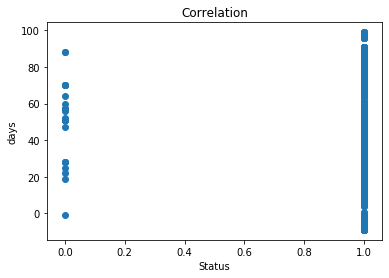

In [21]:
plt.scatter(data[ 'status' ], data[ 'days' ])
plt.title( "Correlation" )
plt.xlabel( "Status" )
plt.ylabel( "days" )


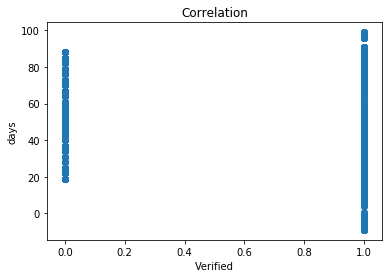

In [22]:
plt.scatter(data[ 'verified' ], data[ 'days' ])
plt.title( "Correlation" )
plt.xlabel( "Verified" )
plt.ylabel( "days")
plt.show()

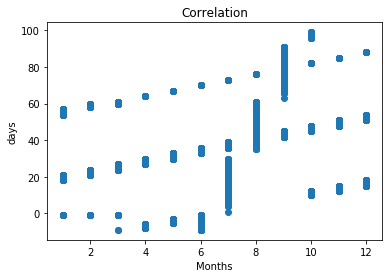

In [23]:
plt.scatter(data[ 'month' ], data[ 'days' ])
plt.title( "Correlation" )
plt.xlabel( "Months" )
plt.ylabel( "days")
plt.show()

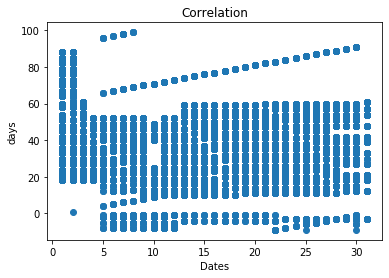

In [24]:
plt.scatter(data[ 'date' ], data[ 'days' ])
plt.title( "Correlation" )
plt.xlabel( "Dates" )
plt.ylabel( "days")
plt.show()
           

<function matplotlib.pyplot.show(*args, **kw)>

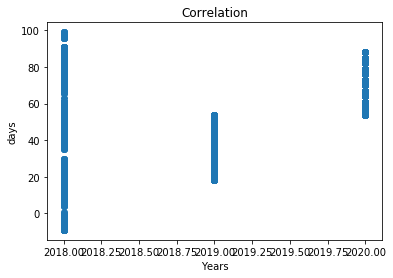

In [25]:
plt.scatter(data[ 'year' ], data[ 'days' ])
plt.title( "Correlation" )
plt.xlabel( "Years" )
plt.ylabel( "days")
plt.show

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.1)

In [27]:
model =LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
accuracy = model.score(X_test,Y_test)

In [29]:
print(accuracy)

0.6524807471968783


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
accuracy =knn.score(X_test,Y_test)
print(accuracy)

0.9974048442906575
